<a href="https://colab.research.google.com/github/sbanwaskar/HelloWorld/blob/master/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh 
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh 
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c rdkit rdkit

! git clone https://github.com/Bibyutatsu/FastJTNNpy3.git

--2021-05-12 04:54:42--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...

In [2]:
cd FastJTNNpy3

/content/FastJTNNpy3


In [3]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))
import pandas as pd 
import rdkit
from rdkit import DataStructs, Chem 
from rdkit.Chem import MACCSkeys, Draw 
import torch

In [4]:
from fast_jtnn.mol_tree import main_mol_tree
from fast_molvae.preprocess import main_preprocess 
from fast_molvae.vae_train import main_vae_train 

from fast_molvae.sample import main_sample 

In [8]:
inp = pd.read_csv('./data/train.txt', names=['SMILES'])


In [9]:
inp['INCHI'] = inp['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')


In [10]:
inp


,SMILES,INCHI
0,CCCCCCC1=NN2C(=N)/C(=C\c3cc(C)n(-c4ccc(C)cc4C)...,IDZWCROXWWNXQL-ZJRBDENDSA-N
1,COCC[C@@H](C)C(=O)N(C)Cc1ccc(O)cc1,YDAGYFXVVBAINK-LLVKDONJSA-N
2,C=CCn1c(S[C@H](C)c2nc3sc(C)c(C)c3c(=O)[nH]2)nn...,JJINXOJEJRZOMB-LLVKDONJSA-N
3,C[NH+](C/C=C/c1ccco1)CCC(F)(F)F,JFUZCTSYPHRVEI-DUXPYHPUSA-O
4,COc1ccc(N2C(=O)C(=O)N(CN3CCC(c4nc5ccccc5s4)CC3...,AIRMUVLCDQWVNR-UHFFFAOYSA-N
...,...,...
9995,O=C(NCc1nc2ccc(F)cc2[nH]1)[C@@H]1C[C@H]1[N+](=...,XMQHITGAOYPEJP-GMSGAONNSA-N
9996,COc1ccc(-c2[nH]cc(CO)[nH+]2)cc1,WXDITMPXBOLDKA-UHFFFAOYSA-O
9997,Cn1ncc2c1CCC[C@H]2NC(=O)CN1CCCC1=O,ZLECFBYOEAHMMM-LLVKDONJSA-N
9998,NC1=C(Br)[C@H](C(F)(F)F)N=N1,HSEQWUKHBPDMSH-UWTATZPHSA-N


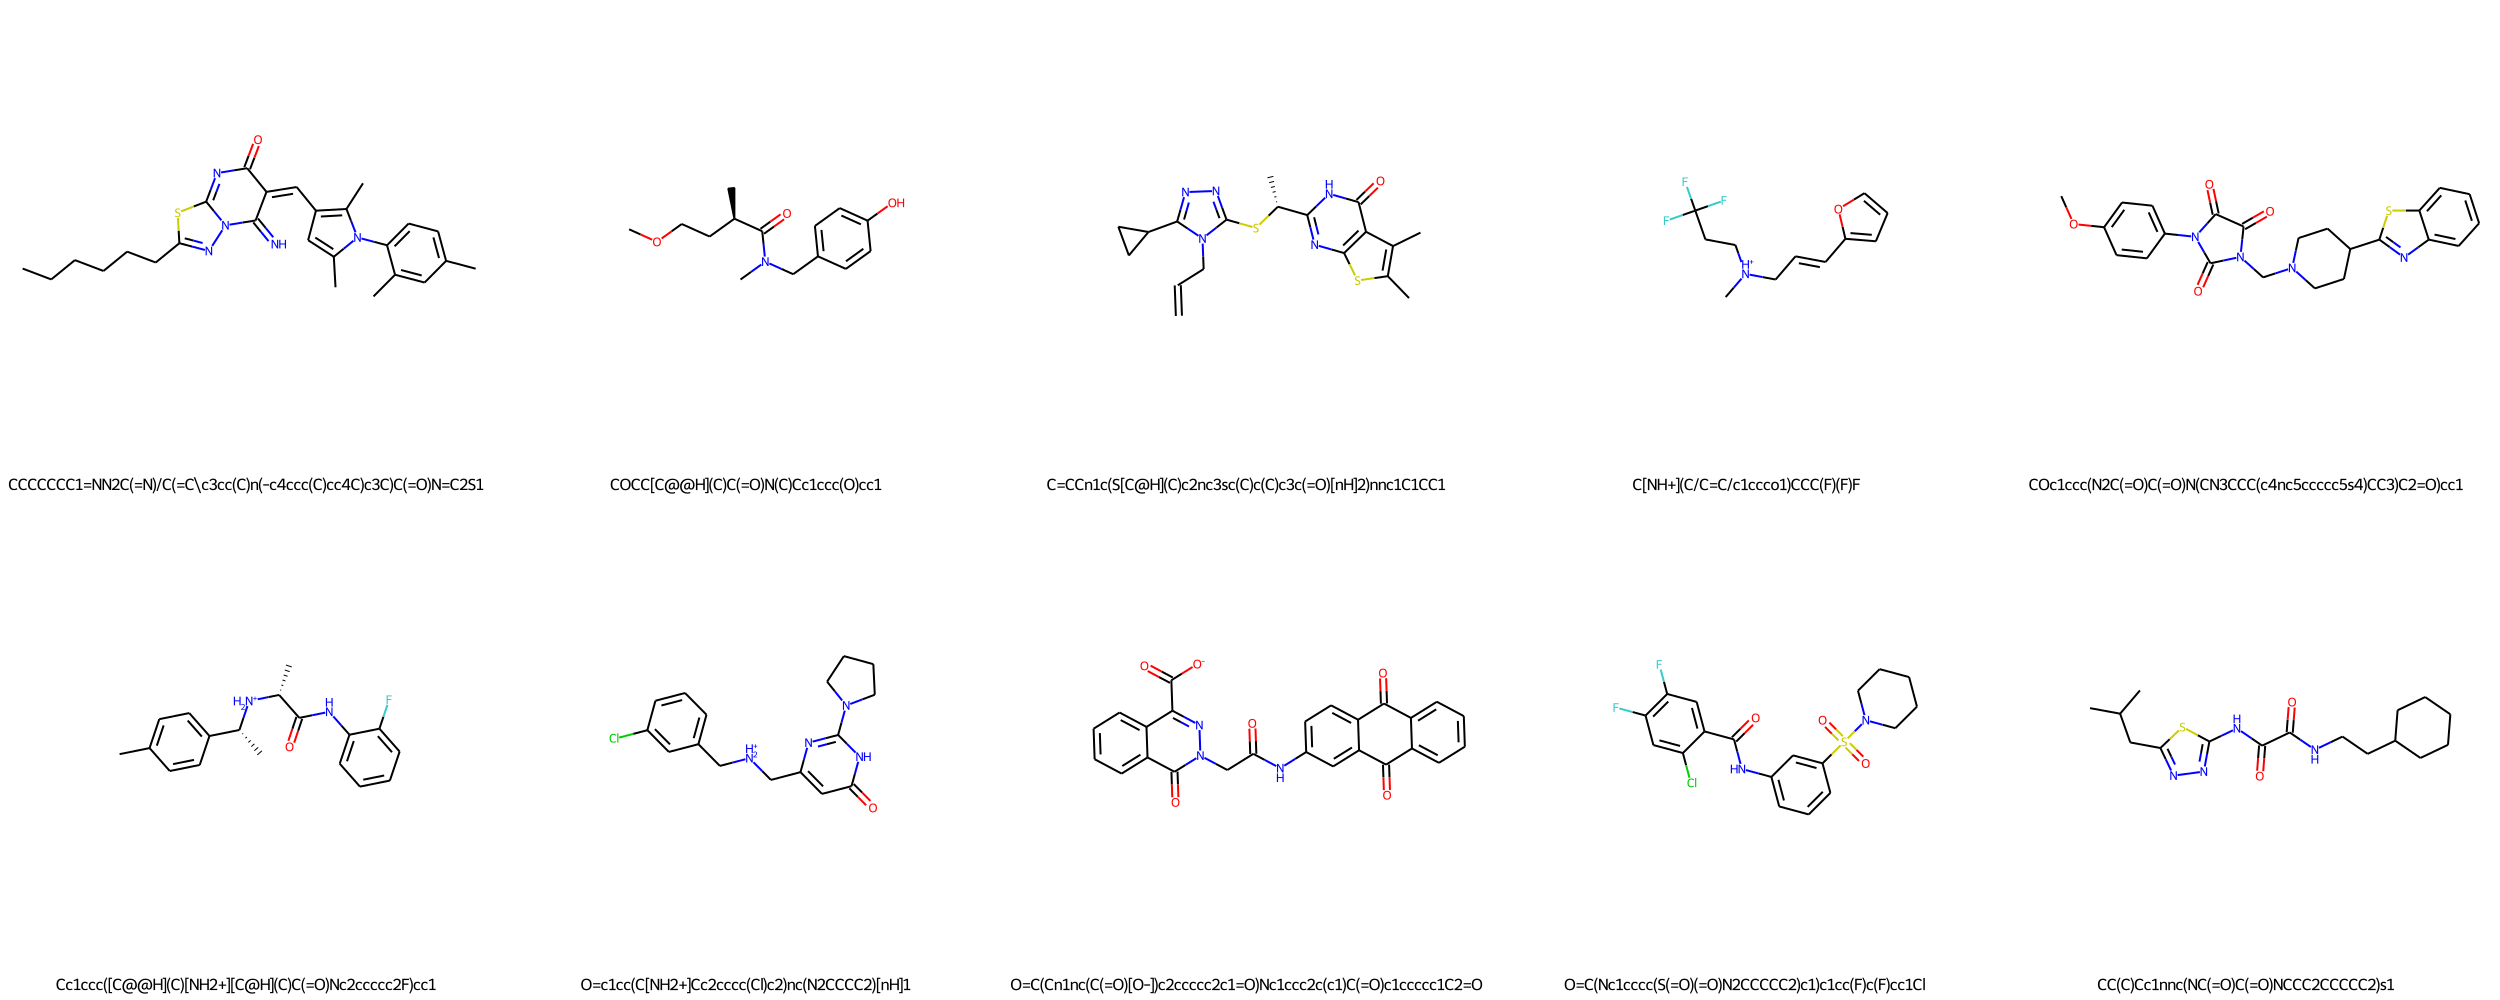

In [11]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES'])[:10])
img

In [12]:
from fast_jtnn.mol_tree import main_mol_tree
main_mol_tree('./data/train.txt', './data/vocab.txt')

In [13]:
from fast_molvae.preprocess import main_preprocess
main_preprocess('./data/train.txt', './fast_molvae/processed/', num_splits=500)

Input File read
Tensorizing .....


 17%|█▋        | 84/500 [00:00<00:00, 834.76it/s]

Tensorizing Complete


100%|██████████| 500/500 [00:00<00:00, 1025.07it/s]


True

In [16]:
from fast_molvae.vae_train import main_vae_train
model = main_vae_train('./fast_molvae/processed/', './data/vocab.txt', './fast_molvae/vae_model/')

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  0%|          | 0/20 [00:00<?, ?it/s]

JTNNVAE(
  (jtnn): JTNNEncoder(
    (embedding): Embedding(331, 450)
    (outputNN): Sequential(
      (0): Linear(in_features=900, out_features=450, bias=True)
      (1): ReLU()
    )
    (GRU): GraphGRU(
      (W_z): Linear(in_features=900, out_features=450, bias=True)
      (W_r): Linear(in_features=450, out_features=450, bias=False)
      (U_r): Linear(in_features=450, out_features=450, bias=True)
      (W_h): Linear(in_features=900, out_features=450, bias=True)
    )
  )
  (decoder): JTNNDecoder(
    (embedding): Embedding(331, 450)
    (W_z): Linear(in_features=900, out_features=450, bias=True)
    (U_r): Linear(in_features=450, out_features=450, bias=False)
    (W_r): Linear(in_features=450, out_features=450, bias=True)
    (W_h): Linear(in_features=900, out_features=450, bias=True)
    (W): Linear(in_features=478, out_features=450, bias=True)
    (U): Linear(in_features=478, out_features=450, bias=True)
    (U_i): Linear(in_features=900, out_features=450, bias=True)
    (W_o): 

100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


In [17]:
from fast_molvae.sample import main_sample
main_sample('./data/vocab.txt', './fast_molvae/vae_model/sample.txt', 'fast_molvae/vae_model/model.epoch-19', 100)

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [19]:
out = pd.read_csv('./fast_molvae/vae_model/sample.txt', names=['SMILES'])


In [20]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
out = out.drop_duplicates(subset=['INCHI'], keep='first')


In [21]:
out

,SMILES,INCHI
0,C1CSCN1,OGYGFUAIIOPWQD-UHFFFAOYSA-N
1,C1=CC2CCC1NN2,CBWRZGNQARXOKI-UHFFFAOYSA-N
2,C1=NCN=CC1,WRLAXLNSBDVNRL-UHFFFAOYSA-N
3,O=P,AUONHKJOIZSQGR-UHFFFAOYSA-N
4,C1=CNCCN=C1,SNZDVARAEBPODD-UHFFFAOYSA-N
6,C1=NOCC1,WEQPBCSPRXFQQS-UHFFFAOYSA-N
7,C1=CNC=CC1,YNGDWRXWKFWCJY-UHFFFAOYSA-N
9,C1=NCSC1,JLPUISACQXFVRC-UHFFFAOYSA-N
11,C1=COCCCO1,SEMAUTYMNAWLQX-UHFFFAOYSA-N
12,C1CNCN=N1,GBNFGOJXMQRDLG-UHFFFAOYSA-N


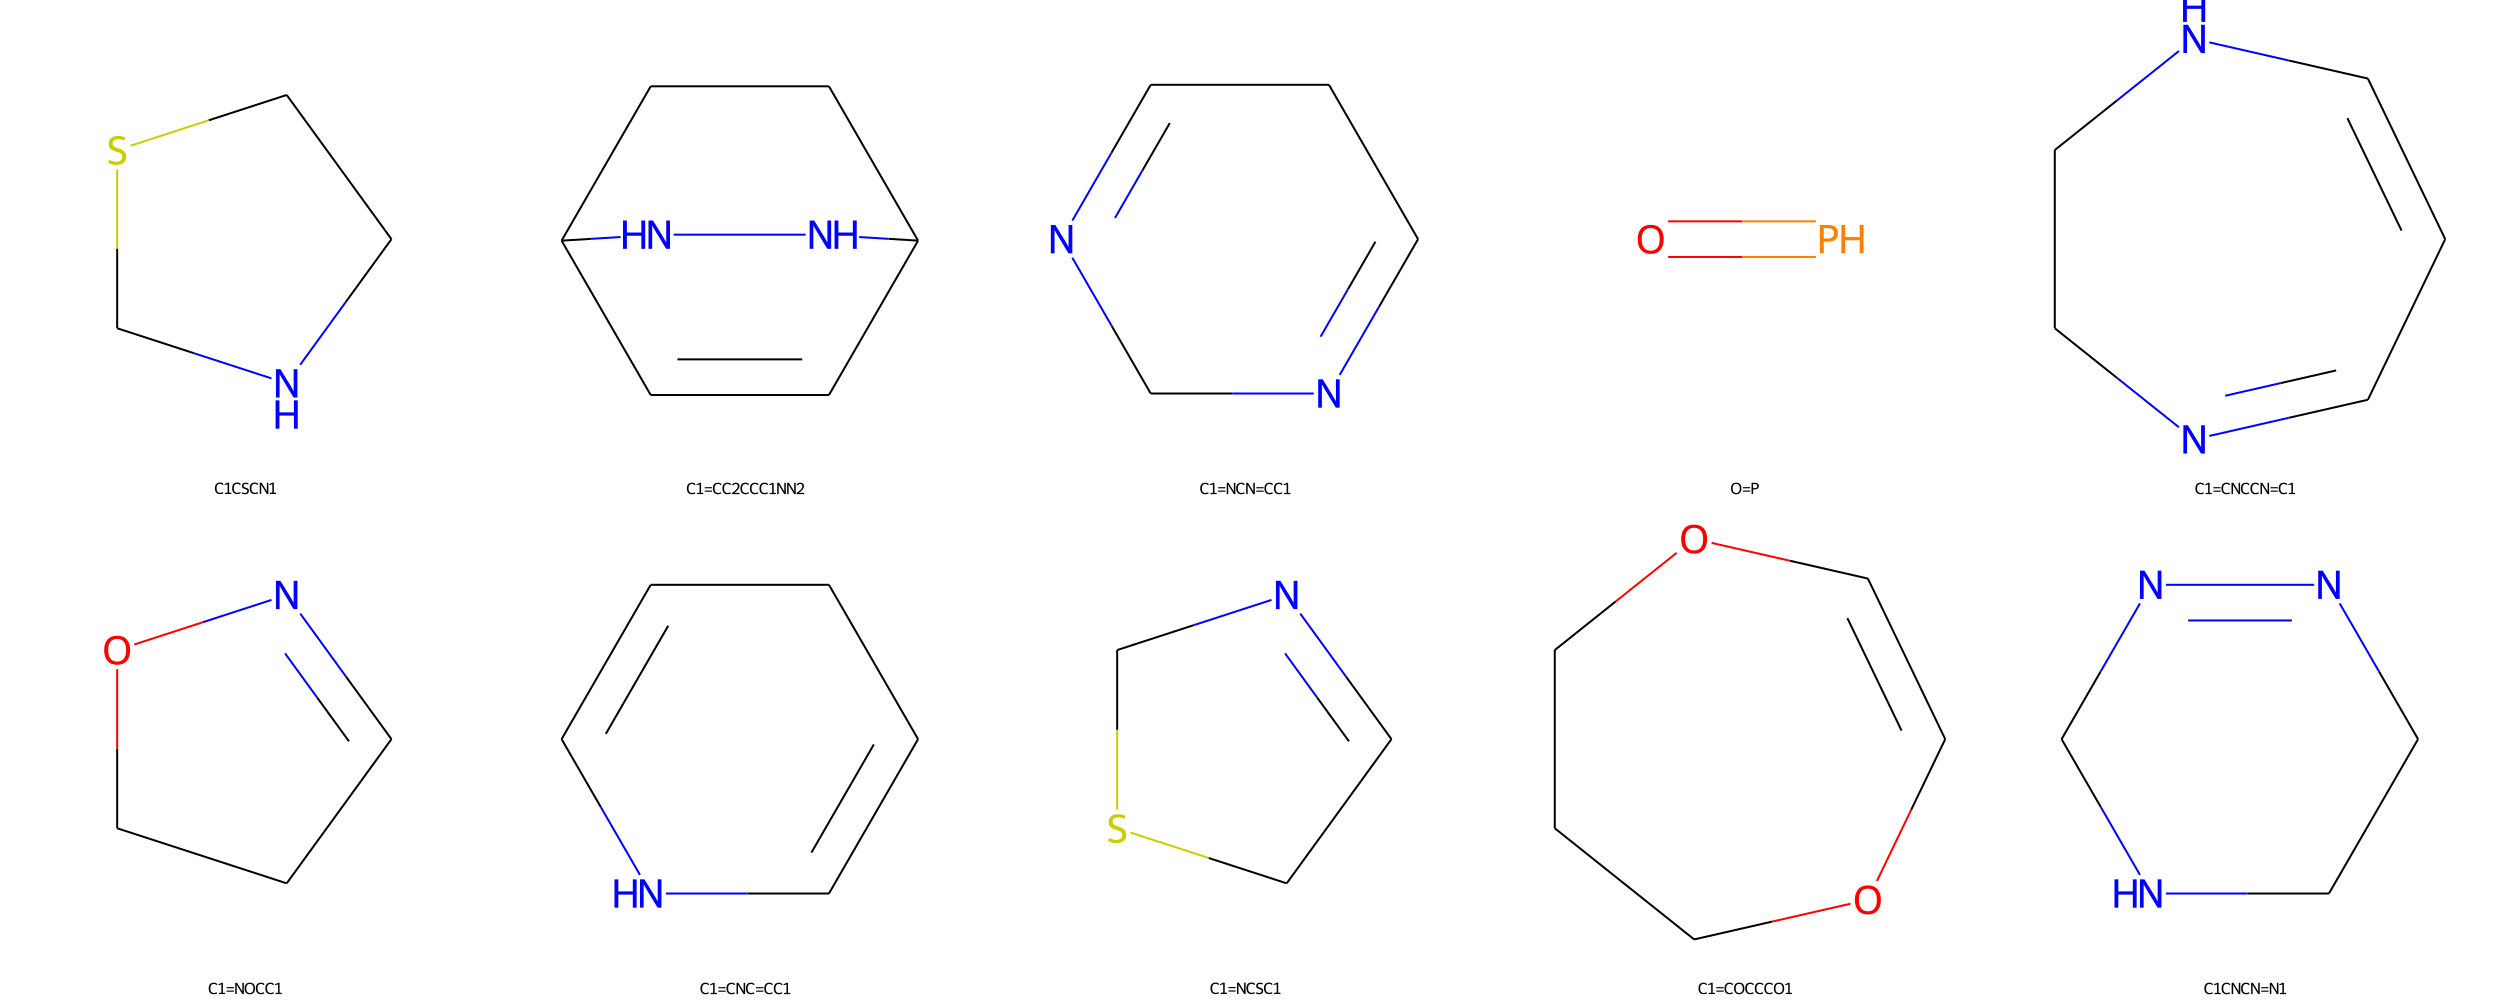

In [22]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(out['SMILES'])[:10])
img

In [24]:
from fast_molvae.sample import load_model
model = load_model('./data/vocab.txt', './fast_molvae/vae_model/model.epoch-19')


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [25]:
z = torch.randn(1, 56//2).cuda() # a random tensor of size (1, latent_size / 2)


In [26]:
print('Random Smile: ', model.decode(z, z, False))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Random Smile:  C1CSCN1


In [27]:
import matplotlib.pyplot as plt


In [29]:
x = [i for _ in range(7) for i in range(-3, 4)]
y = [i for i in range(-3, 4) for _ in range(7)]
label_float = [(z[0][0].item()*(1 + xs*2), z[0][1].item()*(1 + ys*2)) for xs, ys in zip(reversed(x), reversed(y))]
# label = ['%.3f'%(xs)+','+ '%.3f'%(ys) for xs, ys in label_float]#zip(reversed(x), reversed(y))]
z_labels = [z.detach().clone() for _ in range(len(x))]

# Minor changes in the Tensor z to sample new molecules
for i, (xs, ys) in enumerate(label_float):
    z_labels[i][0][0] = xs
    z_labels[i][0][1] = ys

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


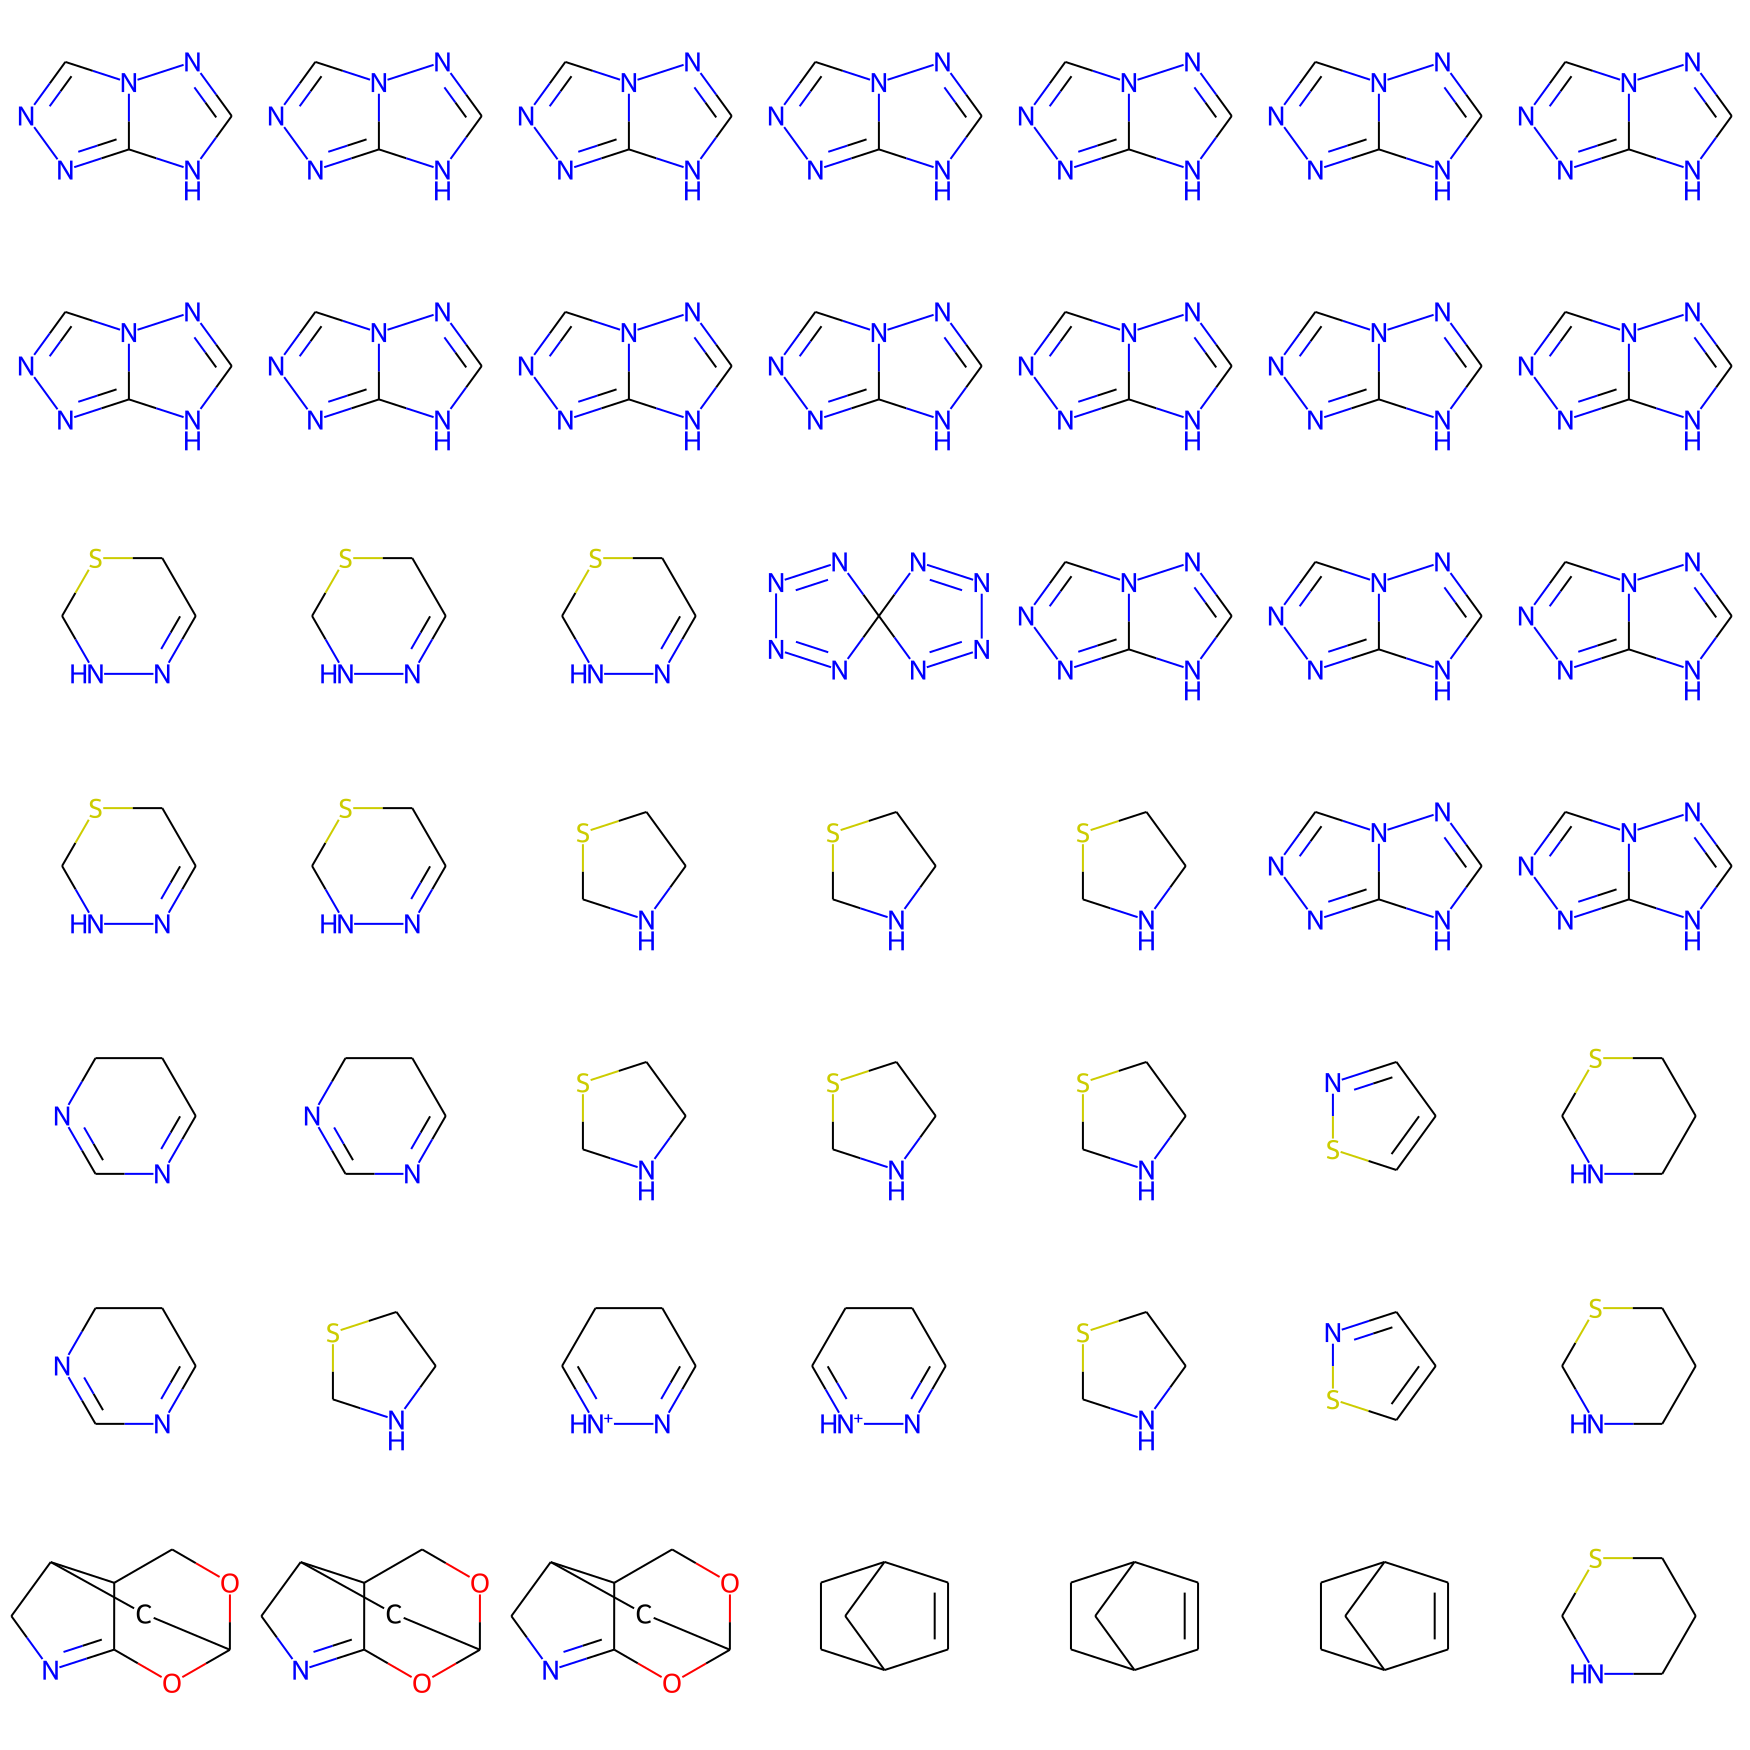

In [30]:
smiles = []
for zs in z_labels:
    smiles.append(model.decode(zs, zs, False))
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=7,subImgSize=(250,250))
img